In [1]:
data = {"height": [1.8, 1.62, 1.65, 1.82, 1.68, 1.64, 1.76, 1.65, 1.92], "month": [4, 1, 8, 4, 12, 11, 3, 10, 1], "number": [3, 7, 2, 0, 2, 7, 4, 0, 1]}

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
for i in data.keys():
    data[i] = np.array(data[i])
data["height"] = data["height"] * 100
print(data)

{'height': array([180., 162., 165., 182., 168., 164., 176., 165., 192.]), 'month': array([ 4,  1,  8,  4, 12, 11,  3, 10,  1]), 'number': array([3, 7, 2, 0, 2, 7, 4, 0, 1])}


In [4]:
var_series_month = sorted(data["month"])
var_series_number = sorted(data["number"])
freq_abs_month = np.unique(var_series_month, return_counts = True)[1]
freq_abs_number = np.unique(var_series_number, return_counts = True)[1]
freq_rel_month = freq_abs_month/np.sum(freq_abs_month)
freq_rel_number = freq_abs_number/np.sum(freq_abs_number)

In [5]:
print(var_series_month, var_series_number, freq_abs_month, freq_abs_number, freq_rel_month, freq_rel_number)

[1, 1, 3, 4, 4, 8, 10, 11, 12] [0, 0, 1, 2, 2, 3, 4, 7, 7] [2 1 2 1 1 1 1] [2 1 2 1 1 2] [0.22222222 0.11111111 0.22222222 0.11111111 0.11111111 0.11111111
 0.11111111] [0.22222222 0.11111111 0.22222222 0.11111111 0.11111111 0.22222222]


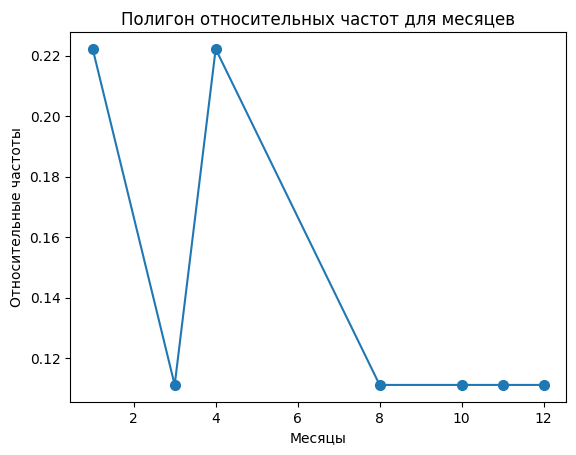

In [6]:
#Полигон относительных частот для месяцев
plt.plot(np.unique(data["month"]), freq_rel_month, marker = 'o', markersize = 7)
plt.xlabel("Месяцы")
plt.ylabel("Относительные частоты")
plt.title("Полигон относительных частот для месяцев")
plt.show()

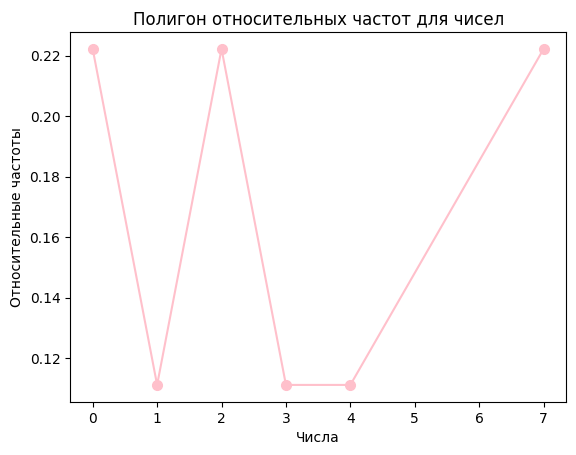

In [7]:
#Полигон относительных частот для чисел
plt.plot(np.unique(data["number"]), freq_rel_number, marker = 'o', markersize = 7, color = 'pink')
plt.xlabel("Числа")
plt.ylabel("Относительные частоты")
plt.title("Полигон относительных частот для чисел")
plt.show()

In [8]:
def plot_empirical(data, nums):
    y = [0.0]*(len(data))
    for i in range(len(data)):
        y[i] = y[i-1] + data[i]
    y = [0] + y
    for i in range(len(y)):
        plt.plot([nums[i], nums[i+1]],[y[i], y[i]], c="blue", marker='o', mfc = 'white', \
                 markevery = [False, True])
    plt.grid()
    plt.show()

Эмпирическая функция распределения для месяцев
$$F(x) = \begin{cases}0 & x <1\\2/9 & 1\leq x <3 \\ 3/9& 3\leq x <4 
\\ 5/9& 4\leq x <8
\\ 6/9& 8\leq x <10
\\ 7/9& 10\leq x <11
\\ 8/9& 11\leq x <12
\\ 1& x \geq 12
\end{cases}$$

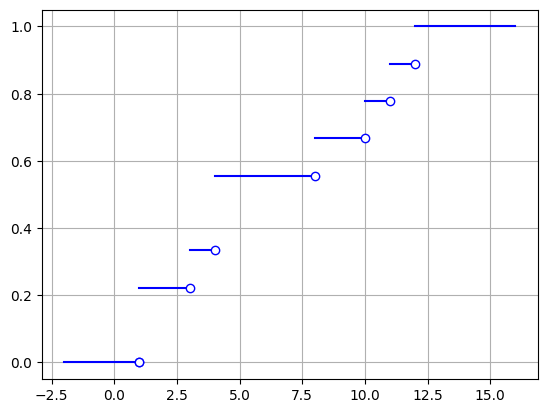

In [10]:
#График эмпирической функции для месяцев 
plt.plot([-2, 1],[0,0], c="blue", marker='o', mfc = 'white', \
                 markevery = [False, True])
plt.plot([12, 16], [1,1], c="blue")
plot_empirical(freq_rel_month, sorted(np.concatenate((np.array([-np.inf]), np.unique(var_series_month), np.array([np.inf])), axis = None)))

Эмпирическая функция распределения для чисел
$$F(x) = \begin{cases}0 & x <0\\2/9 & 0\leq x <1 \\ 3/9& 1\leq x <2 
\\ 5/9& 2\leq x <3
\\ 6/9& 3\leq x <4
\\ 7/9& 4\leq x <7
\\ 1& x \geq 7
\end{cases}$$

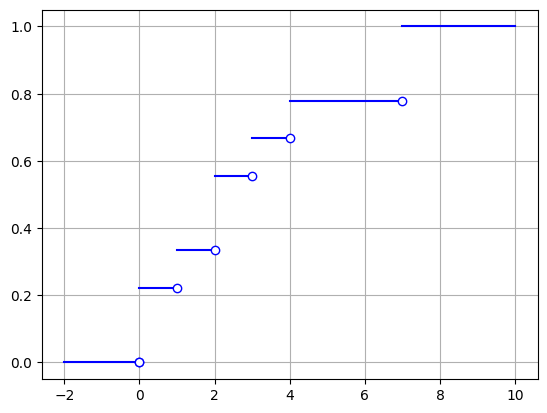

In [12]:
#График эмпирической функции для чисел
plt.plot([-2, 0],[0,0], c="blue", marker='o', mfc = 'white', \
                 markevery = [False, True])
plt.plot([7, 10], [1,1], c="blue")
plot_empirical(freq_rel_number, sorted(np.concatenate((np.array([-np.inf]), np.unique(var_series_number), np.array([np.inf])), axis = None)))

In [13]:
#Описательные статистики для вариационного ряда по месяцам
print(f'Выборочное среднее {np.round(np.mean(var_series_month), 3)}')
print(f'Выборочная дисперсия {np.round(np.var(var_series_month), 3)}')
print(f'Выборочное стандартное отклонение {np.round(np.std(var_series_month), 3)}')
print(f'Выборочная медиана {np.median(var_series_month)}')
print(f'Коэффициент вариации {np.round(np.std(var_series_month)/np.mean(var_series_month), 3)}')

Выборочное среднее 6.0
Выборочная дисперсия 16.444
Выборочное стандартное отклонение 4.055
Выборочная медиана 4.0
Коэффициент вариации 0.676


In [14]:
#Описательные статистики для вариационного ряда по числам
print(f'Выборочное среднее {np.round(np.mean(var_series_number), 3)}')
print(f'Выборочная дисперсия {np.round(np.var(var_series_number), 3)}')
print(f'Выборочное стандартное отклонение {np.round(np.std(var_series_number), 3)}')
print(f'Выборочная медиана {np.median(var_series_number)}')
print(f'Коэффициент вариации {np.round(np.std(var_series_number)/np.mean(var_series_number), 3)}')

Выборочное среднее 2.889
Выборочная дисперсия 6.321
Выборочное стандартное отклонение 2.514
Выборочная медиана 2.0
Коэффициент вариации 0.87


# Непрерывные данные

In [17]:
n = len(data["height"])
m = int(np.round(1+3.332*np.log10(n)))
h = (max(data["height"])-min(data["height"]))/m
print(n,m,h)

9 4 7.5


In [18]:
edges = [[min(data["height"])-h/2,min(data["height"])-h/2+h]]
for i in range(m):
    edges.append([edges[i][1],edges[i][1]+h])
edges = np.array(edges)
print(edges)

[[158.25 165.75]
 [165.75 173.25]
 [173.25 180.75]
 [180.75 188.25]
 [188.25 195.75]]


In [19]:
freq_abs_height = np.array([0]*(m+1))
for i in data["height"]:
    for j in range(m+1):
        if edges[j][0]<=i<=edges[j][1]:
            freq_abs_height[j] += 1
freq_rel_height = np.array(freq_abs_height / sum(freq_abs_height))
print(freq_abs_height, freq_rel_height)

[4 1 2 1 1] [0.44444444 0.11111111 0.22222222 0.11111111 0.11111111]


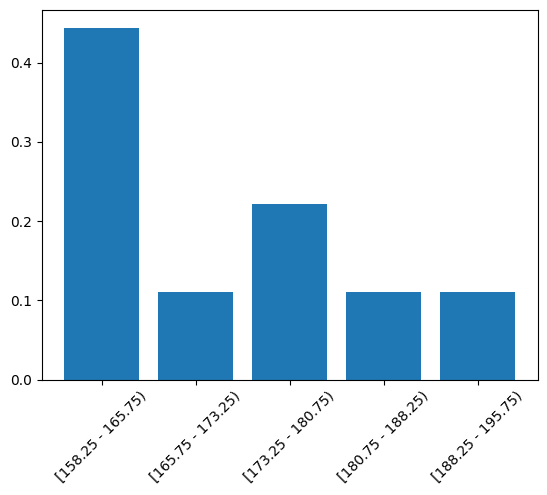

In [20]:
plt.bar([f'[{edges[i][0]} - {edges[i][1]})' for i in range(len(edges))], height = freq_rel_height)
plt.xticks(rotation=45)
plt.show()

Эмпирическая функция распределения для роста
$$F(x) = \begin{cases}0 & x <=158.25\\4/9 & 158.25\leq x <165.75
\\ 5/9& 165.75\leq x <173.25
\\ 7/9& 173.25\leq x <180.75
\\ 8/9& 180.75\leq x <188.25
\\ 1& x > 188.25
\end{cases}$$

In [22]:
def plot_IVS(edges, data):
    for i in range(len(edges)):
        plt.plot([edges[i][0], edges[i][1]],[data[i], data[i+1]], c="blue", marker = 'o')

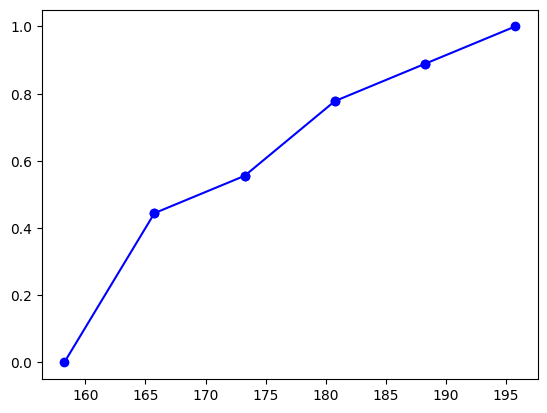

In [23]:
plot_IVS(edges, np.concatenate((np.array([0]),np.cumsum(freq_rel_height)), axis = None))
plt.show()

In [24]:
#Описательные статистики для интервального вариационного ряда
print(f'Выборочное среднее {np.round(np.mean(data["height"]), 3)}')
print(f'Выборочная дисперсия {np.round(np.var(data["height"]), 3)}')
print(f'Выборочное стандартное отклонение {np.round(np.std(data["height"]), 3)}')
print(f'Выборочная медиана {np.median(data["height"])}')
print(f'Коэффициент вариации {np.round(np.std(data["height"])/np.mean(data["height"]), 3)}')

Выборочное среднее 172.667
Выборочная дисперсия 94.889
Выборочное стандартное отклонение 9.741
Выборочная медиана 168.0
Коэффициент вариации 0.056
